In [45]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics, svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import warnings
import keras

## neural network libraries
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Input
from mlxtend.plotting import plot_confusion_matrix
from tensorflow.keras.optimizers import Adam
import pickle
import joblib

In [46]:
# Suppress all Deprecation Warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [47]:
## load data
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [48]:
## info for missing value and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [49]:
## statistics summary of all variables in dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [50]:
## statistics of dataset for people with diabetes
df[df["Outcome"] == 1].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.0
mean,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164,1.0
std,3.741239,31.939622,21.491812,17.679711,138.689125,7.262967,0.372354,10.968254,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088000,21.000000,1.0
25%,1.750000,119.000000,66.000000,0.000000,0.000000,30.800000,0.262500,28.000000,1.0
50%,4.000000,140.000000,74.000000,27.000000,0.000000,34.250000,0.449000,36.000000,1.0
75%,8.000000,167.000000,82.000000,36.000000,167.250000,38.775000,0.728000,44.000000,1.0
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,70.000000,1.0


In [51]:
## statistics of dataset for people without diabetes
df[df["Outcome"] == 0].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,3.298000,109.9800,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000,0.0
std,3.017185,26.1412,18.063075,14.889947,98.865289,7.689855,0.299085,11.667655,0.0
min,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.0
25%,1.000000,93.0000,62.000000,0.000000,0.000000,25.400000,0.229750,23.000000,0.0
50%,2.000000,107.0000,70.000000,21.000000,39.000000,30.050000,0.336000,27.000000,0.0
75%,5.000000,125.0000,78.000000,31.000000,105.000000,35.300000,0.561750,37.000000,0.0
max,13.000000,197.0000,122.000000,60.000000,744.000000,57.300000,2.329000,81.000000,0.0


In [52]:
## counting the number of diabetic and non-diabetic
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [53]:
## data cleaning
## changing zeros to null values
df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.nan)
## counting null values for new data frame
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [54]:
## filling glucose, Bloodpressure with mean
## filling skinthickness and insulin, BMI with median
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].median())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].median())
df['BMI'] = df['BMI'].fillna(df['BMI'].median())

## checking the null values have changed after imputting missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [55]:
## boxplot of data to see outliers
df[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Age"]].boxplot(figsize=(5,5))
plt.xticks(rotation=45)
plt.tight_layout

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

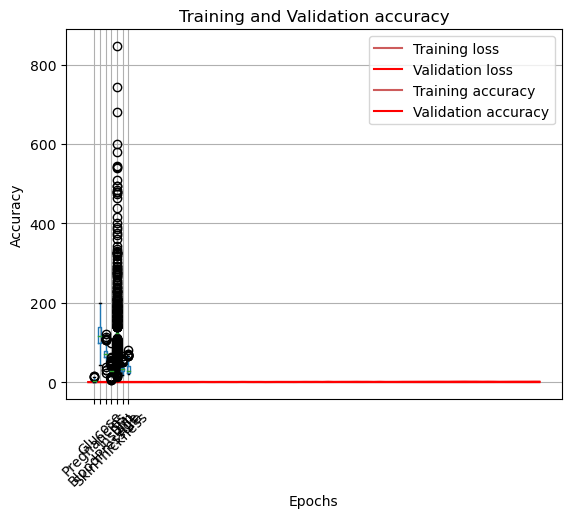

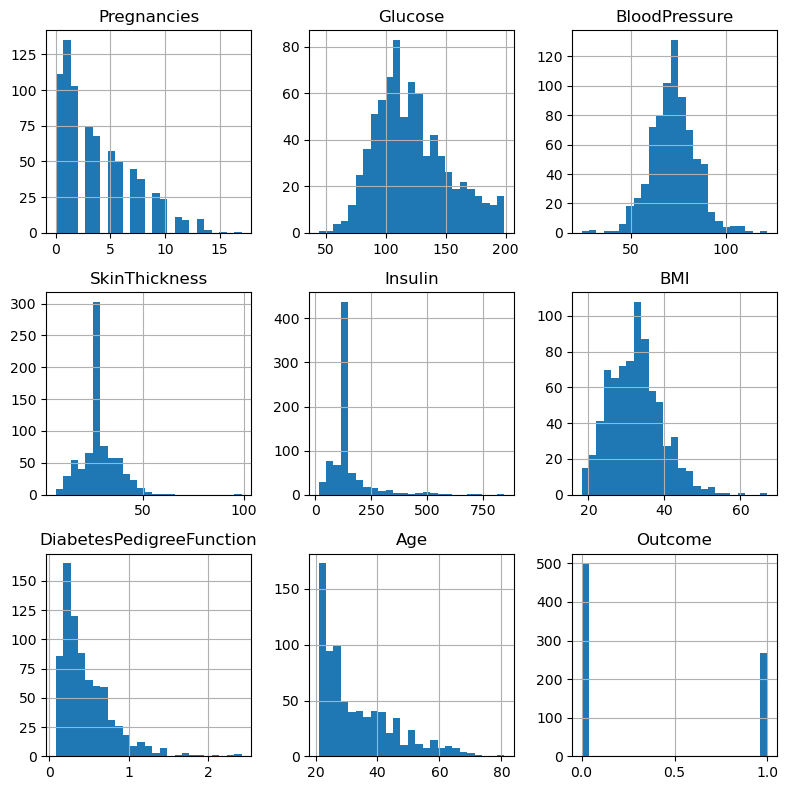

In [56]:
## histograms of data
df.hist(figsize = (8, 8), bins = 25)
plt.tight_layout()
plt.show()

In [57]:
## correlation matrix
plt.figure(figsize=(10,8))
corr_mat = df.corr()
sns.heatmap(corr_mat, annot=True)
plt.title("Correlation Matrix Heatmap")

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

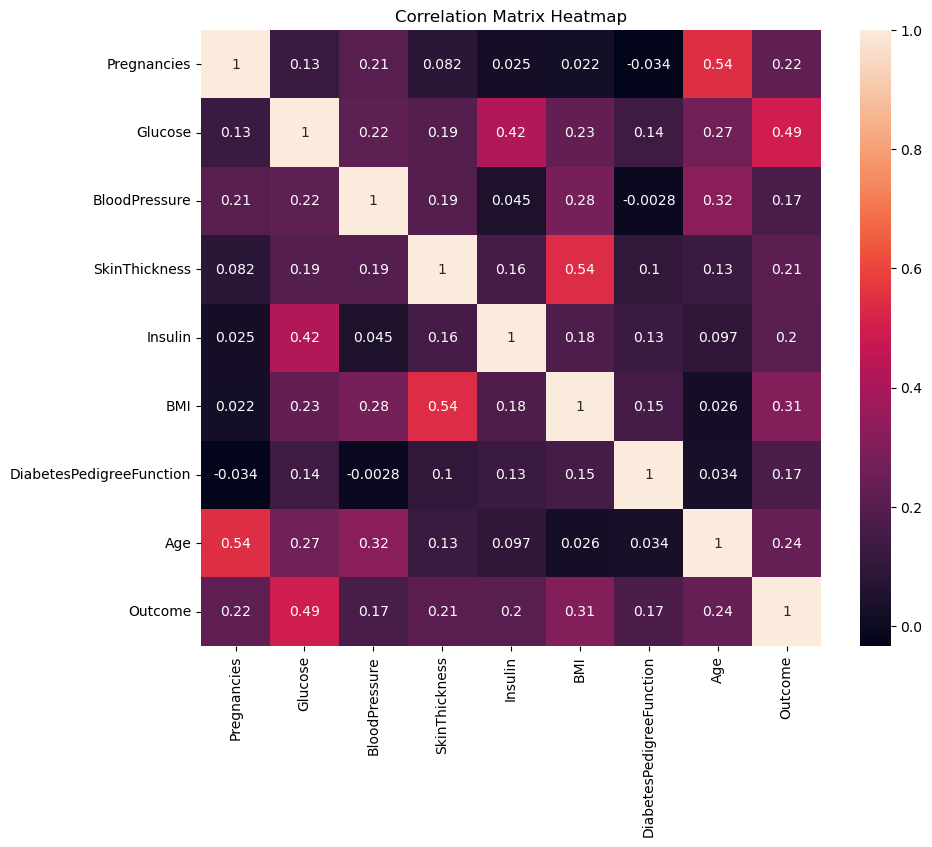

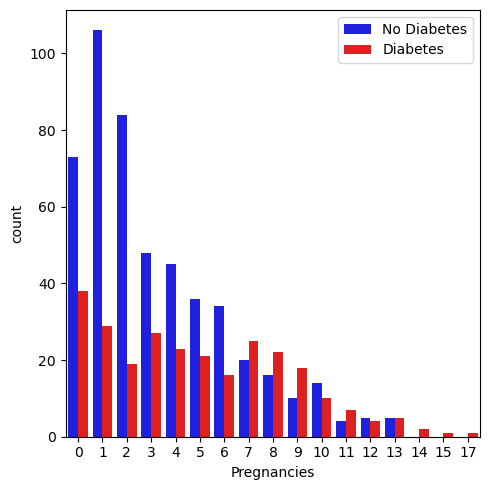

In [58]:
plt.subplots(figsize=(5, 5))

# First row
sns.countplot(data=df, x="Pregnancies", hue="Outcome", palette=["blue", "red"])
plt.legend(['No Diabetes', 'Diabetes'])

plt.tight_layout()  
plt.show()

In [59]:
## defining independent and dependent variables
X=df.drop(["Outcome"],axis=1)
y=df["Outcome"]

In [60]:
# create scaler
scaler = StandardScaler()

# Fit and transform the data
scale_X = scaler.fit_transform(X)

# Save the scaler to a file using pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

## splitting the data for training and testing
X_train, X_test, y_train,y_test = train_test_split(scale_X,y,test_size=0.2,random_state=23)

In [88]:
## Neural Network
model = Sequential()

## input layer
model.add(Input(shape=(8,)))
## hidden layer 1
model.add(Dense(units= 30, kernel_initializer= 'uniform', activation = 'relu'))
## regularisation 1
model.add(Dropout(0.1))
## hidden layer 2 
model.add(Dense(units= 20, kernel_initializer= 'uniform', activation = 'relu'))
## output layer
model.add(Dense(units= 1, kernel_initializer= 'uniform', activation = 'sigmoid'))

## compiling the ANN
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

## training the model by backpropagating (updating weights) after each sample of 25
history = model.fit(X_train, y_train, batch_size = 25, epochs = 80, validation_split=0.25)

Epoch 1/80
19/19 [==============================] - 2s 15ms/step - loss: 0.6913 - accuracy: 0.6109 - val_loss: 0.6880 - val_accuracy: 0.6494
Epoch 2/80
19/19 [==============================] - 0s 4ms/step - loss: 0.6824 - accuracy: 0.6652 - val_loss: 0.6752 - val_accuracy: 0.6623
Epoch 3/80
19/19 [==============================] - 0s 4ms/step - loss: 0.6599 - accuracy: 0.7065 - val_loss: 0.6427 - val_accuracy: 0.7338
Epoch 4/80
19/19 [==============================] - 0s 4ms/step - loss: 0.6115 - accuracy: 0.7478 - val_loss: 0.5865 - val_accuracy: 0.7273
Epoch 5/80
19/19 [==============================] - 0s 4ms/step - loss: 0.5444 - accuracy: 0.7587 - val_loss: 0.5348 - val_accuracy: 0.7338
Epoch 6/80
19/19 [==============================] - 0s 4ms/step - loss: 0.4951 - accuracy: 0.7587 - val_loss: 0.5140 - val_accuracy: 0.7468
Epoch 7/80
19/19 [==============================] - 0s 4ms/step - loss: 0.4760 - accuracy: 0.7609 - val_loss: 0.5085 - val_accuracy: 0.7273
Epoch 8/80
19/19 [=

In [89]:
## calculating the accuracy score
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy is', val_accuracy*100))


val_accuracy is: 75.94%


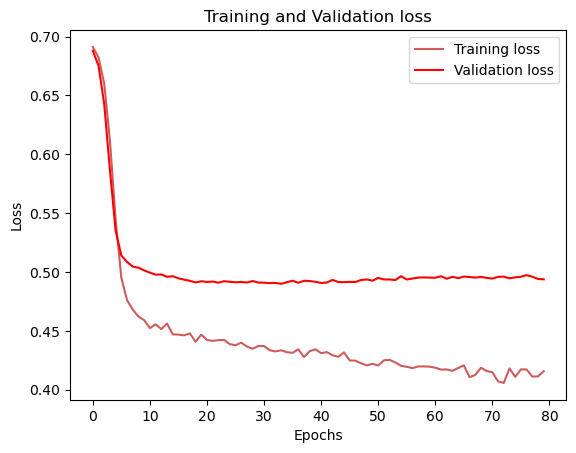

In [92]:
## storing the stages of backpropation
history_df = pd.DataFrame(history.history)

## plotting the loss at each backpropagation stage in validation vs training
plt.plot(history_df.loc[:, ['loss']], "#CD5C5C", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#FF0000", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")
plt.show()

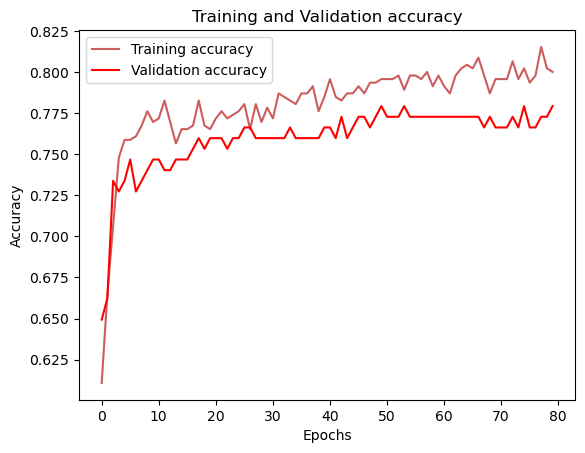

In [93]:
## plotting the accuracy at each backpropagation stage in validation vs training
plt.plot(history_df.loc[:, ['accuracy']], "#CD5C5C", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']],"#FF0000", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()